In [5]:
from mean_reversion_algo import MeanReversionAlgo
%load_ext autoreload
%autoreload 2

### Simple Idea for a Trading Algorithm 

We define our strategy as an intraday mean-reversion. We look for "biggest loss days" and "biggest win days". We want to probe at an answer to the question: what happened the following day? 

In so far as yesterday's losers gain today, or vice versa, this should be actionable. We can always look up who was yesterday's biggest loser. We don't need any further info. But does this info alone give us an edge? 

What if we condition on winners/losers above a certain threshold? What if we condition on the index being overal up/down? Find out! 

We allow the opportunity to import data from the 1) Dow-Jones index, 2) the Nasdaq and 3) the Nifty50. 

## How do you use the Class? (simple case) 
index_algo = MeanReversionAlgo(index='dow')
index_algo.run()

#### Pure plot without conditions
index_algo.plot_results()

#### Conditional plot based on index performance up
index_algo.plot_results(index_condition='up')

#### Conditional plot based on winners, up more than 5%, on days when the index was down
index_algo.plot_results(index_condition='down', category_condition={'type': 'winner', 'thresholds': (5, None)})

#### Conditional correlation winners, up more than 30%, on days when the index was up
index_algo.calculate_segmented_correlation(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

## Let's look at the Dow in the period from Jan20 up until last week. 

Fetching data for 29 tickers in the dow index... If Nasdaq, please be patient. Make some coffee?
Fetching data progress: 100.00%Successfully fetched data for all tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: -0.04, T-statistic: -1.17, Observations: 1060
Positive Index Performance: Correlation: 0.07, T-statistic: 1.64, Observations: 571
Negative Index Performance: Correlation: -0.14, T-statistic: -3.14, Observations: 488
Plotting results...


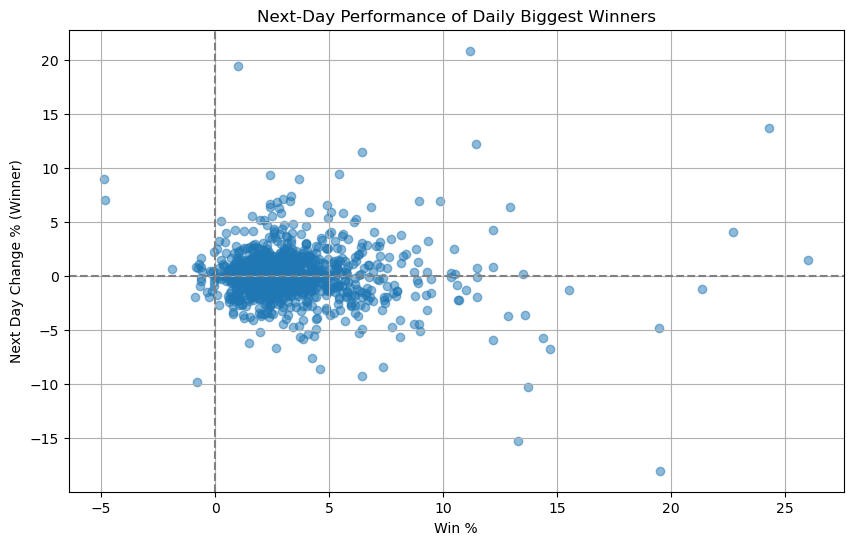

Analysis complete.


In [25]:
dow = MeanReversionAlgo(index='dow', start_date="01/01/2020", end_date="22/03/2024")
dow.run()

## Let's check out what happens if we control for index-overall, and whether you're a winner/loser

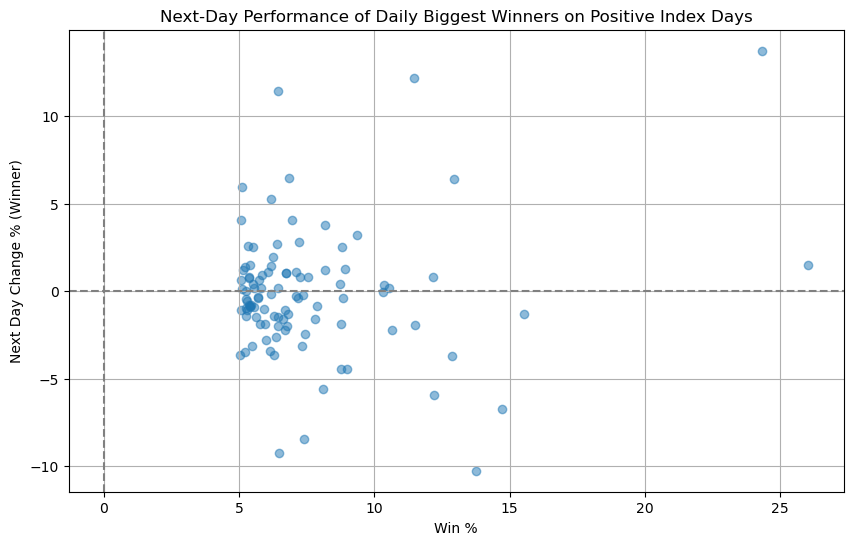

In [26]:
dow.plot_results(index_condition='up', category_condition={'type': 'winner', 'thresholds': (5, None)})

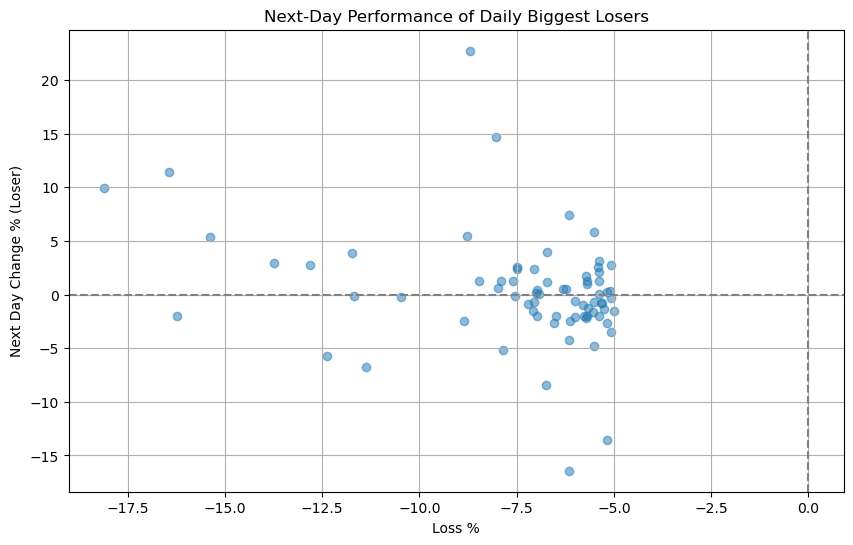

In [27]:
dow.plot_results(index_condition='down', category_condition={'type': 'loser', 'thresholds': (5, None)})

## Now let's turn to Nifty 50 

Fetching data for 30 tickers in the nifty50 index... If Nasdaq, please be patient. Make some coffee?
Fetching data progress: 100.00%Failed to fetch data for 1 tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: 0.10, T-statistic: 3.33, Observations: 1046
Positive Index Performance: Correlation: 0.08, T-statistic: 2.00, Observations: 620
Negative Index Performance: Correlation: 0.12, T-statistic: 2.42, Observations: 423
Plotting results...


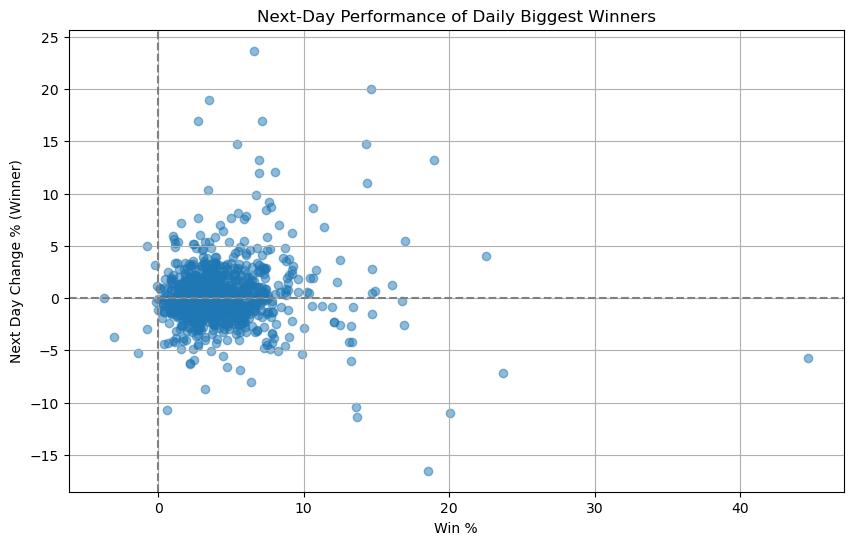

Analysis complete.


In [28]:
nifty = MeanReversionAlgo(index='nifty50', start_date="01/01/2020", end_date="22/03/2024")
nifty.run()

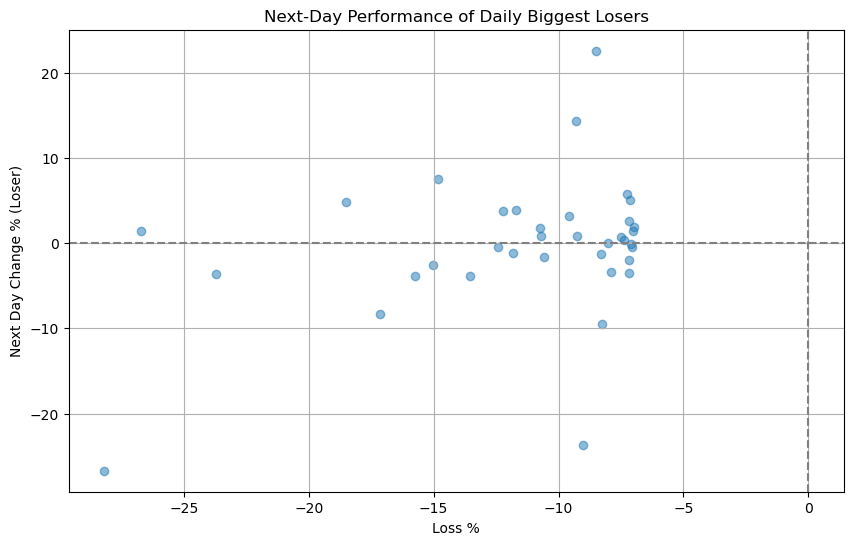

In [29]:
nifty.plot_results(index_condition='down', category_condition={'type': 'loser', 'thresholds': (7, None)})

## Finally, let's do Nasdaq (be warned ... 
... dataset larger, so this will take a couple of minutes)  

Fetching data for 4398 tickers in the nasdaq index... If Nasdaq, please be patient. Make some coffee?
Fetching data progress: 100.00%Failed to fetch data for 96 tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: -0.18, T-statistic: -4.46, Observations: 590
Positive Index Performance: Correlation: 0.17, T-statistic: 0.30, Observations: 5
Negative Index Performance: Correlation: -0.09, T-statistic: -0.23, Observations: 9
Plotting results...


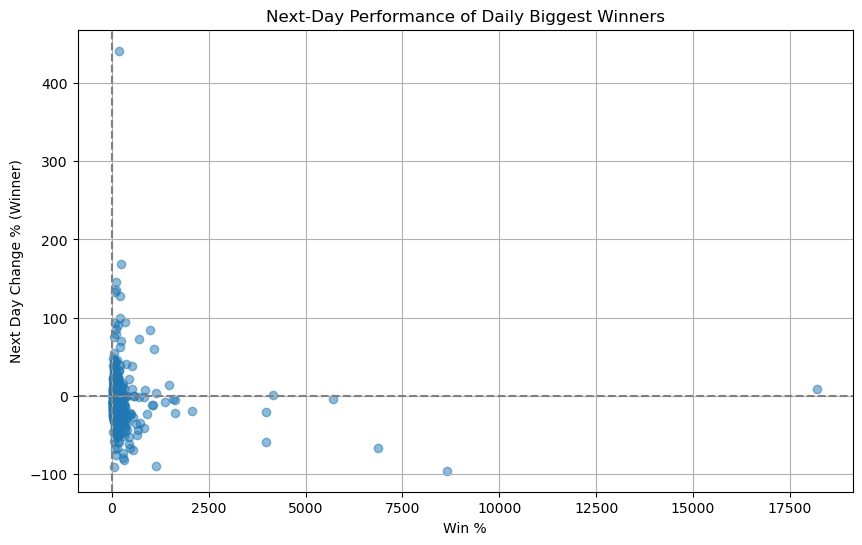

Analysis complete.


In [6]:
nasdaq = MeanReversionAlgo(index='nasdaq', start_date="01/01/2020", end_date="22/03/2024")
nasdaq.run()

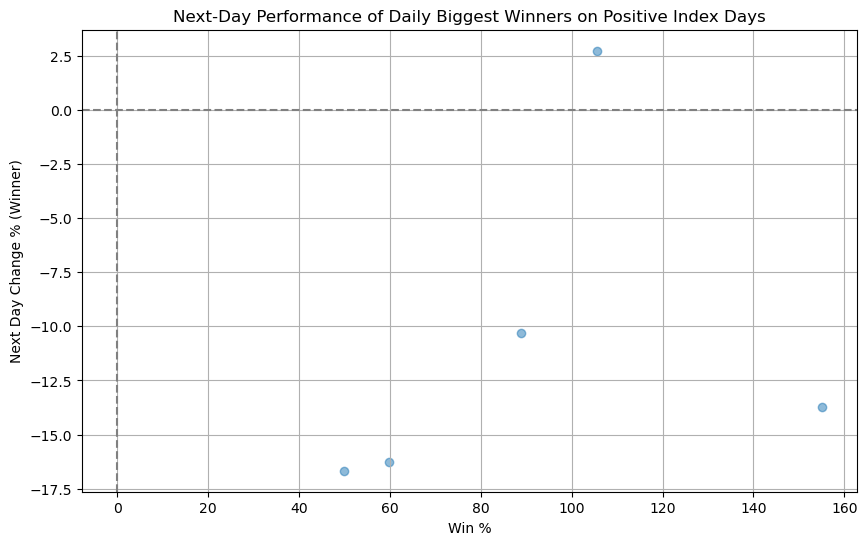

In [8]:
nasdaq.plot_results(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

In [9]:
nasdaq.calculate_segmented_correlation(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

Correlation: 0.315, P-value: 0.605, Sample size: 5


#### Tentative Conclusion: 
If the highest gainer on the Nasdaq goes up by more than 30%, maybe you should bet on it going down the next day. Odds are pretty good. 

## Let's try a different approach

What if we take as a basis two single stocks - instead of the index as a whole. We choose a low-beta and a high-beta stock. We'll calculate odds of strategy being successful. 

And then we'll backtest our strategy investing in Alphabet. Doing so we will control our risk by using the theory of "fractional kelly". 

Background: A Kelly Fractional is often used in the game of black jack. Occasionally, proponents also  apply the theory to manage risk in the stock market. The point is that each time our strategy results in a profit, the next investment will be more aggressive. On the other hand when a trade results in a loss, we lower the stakes in the next trade.

Let's see what happens... To keep things simple, we look at cases where a stock dropped more than 5 pct in a given day. 

[*********************100%%**********************]  1 of 1 completed

The likelihood of an increase after a -5% drop for GOOG is: 52.17%


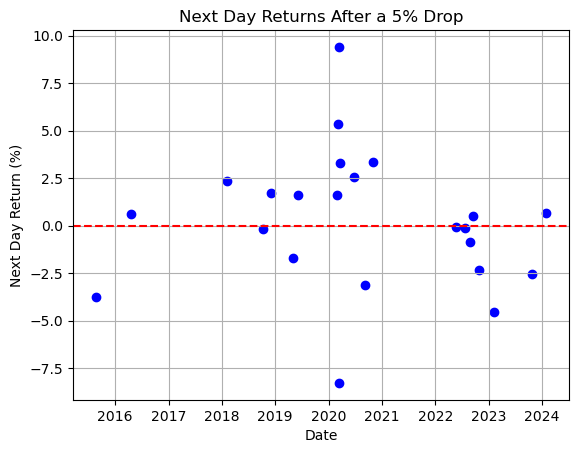

In [8]:
mean_reversion_algo = MeanReversionAlgo()
goog_analysis = mean_reversion_algo.analyze_stock_return("GOOG", "2015-01-01")

[*********************100%%**********************]  1 of 1 completed

The likelihood of an increase after a -5% drop for CPS is: 51.27%


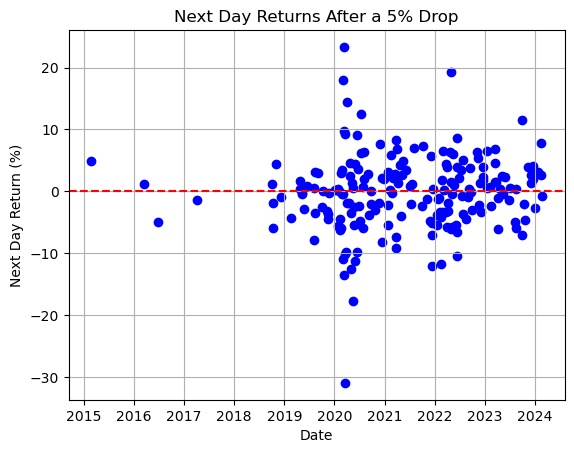

In [9]:
cps_analysis = mean_reversion_algo.analyze_stock_return("CPS", "2015-01-01")

We see that the probability decreases, which is a sign that our strategy becomes less efficient when the correlation to the market decreases. The strategy could be more efficient with larger names, but still profitable.

Now lets backtest the idea:
Our criteria: Initial capital: 100.000 Initial position size: 1% Maximum position size: 5% Kelly Fractional: 50%

[*********************100%%**********************]  1 of 1 completed


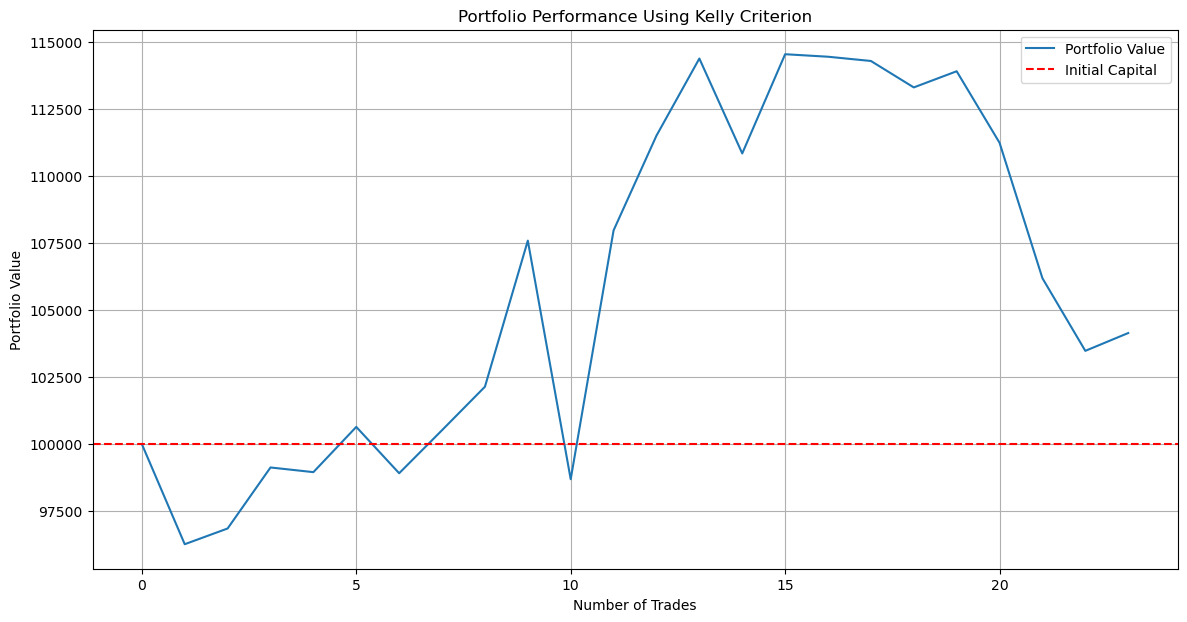

In [13]:
initial_capital = 100000  
max_risk = 0.05  
risk_per_trade = 0.01  
kelly_fractional = 0.5 
stock_ticker = 'GOOGL'
start_date = '2015-01-01'
mean_reversion_algo = MeanReversionAlgo()
goog_analysis = mean_reversion_algo.analyze_stock_return("GOOG", "2015-01-01", verbose=False, plot=False)
portfolio_values = mean_reversion_algo.backtest_kelly_strategy(initial_capital, max_risk, risk_per_trade, kelly_fractional)
mean_reversion_algo.plot_portfolio_performance(portfolio_values, initial_capital)

It seems that the strategy is (mildly) profitable